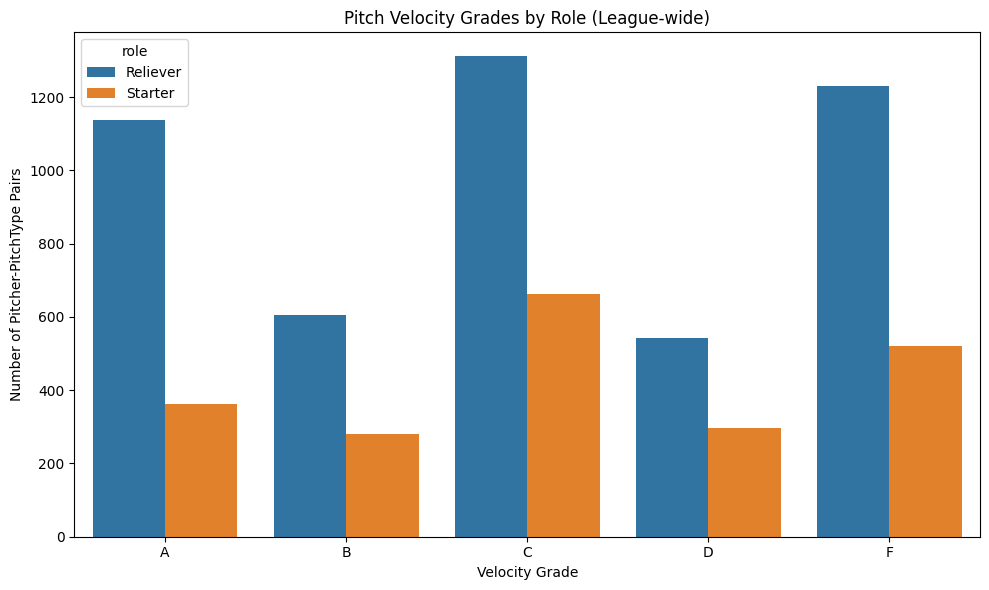

C:\Users\belgr\AppData\Local\Temp\ipykernel_60100\1702250019.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_a_relievers_sorted, x='team', y='count', palette='Greens_d')


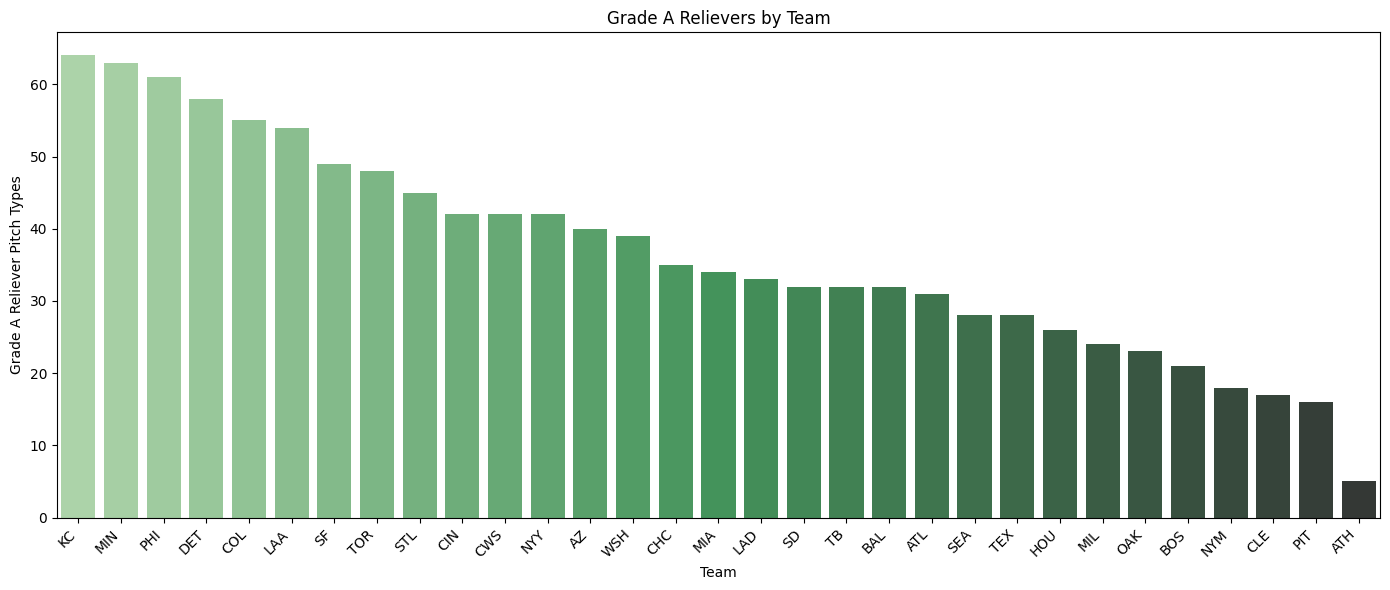

C:\Users\belgr\AppData\Local\Temp\ipykernel_60100\1702250019.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_a_starters_sorted, x='team', y='count', palette='Blues_d')


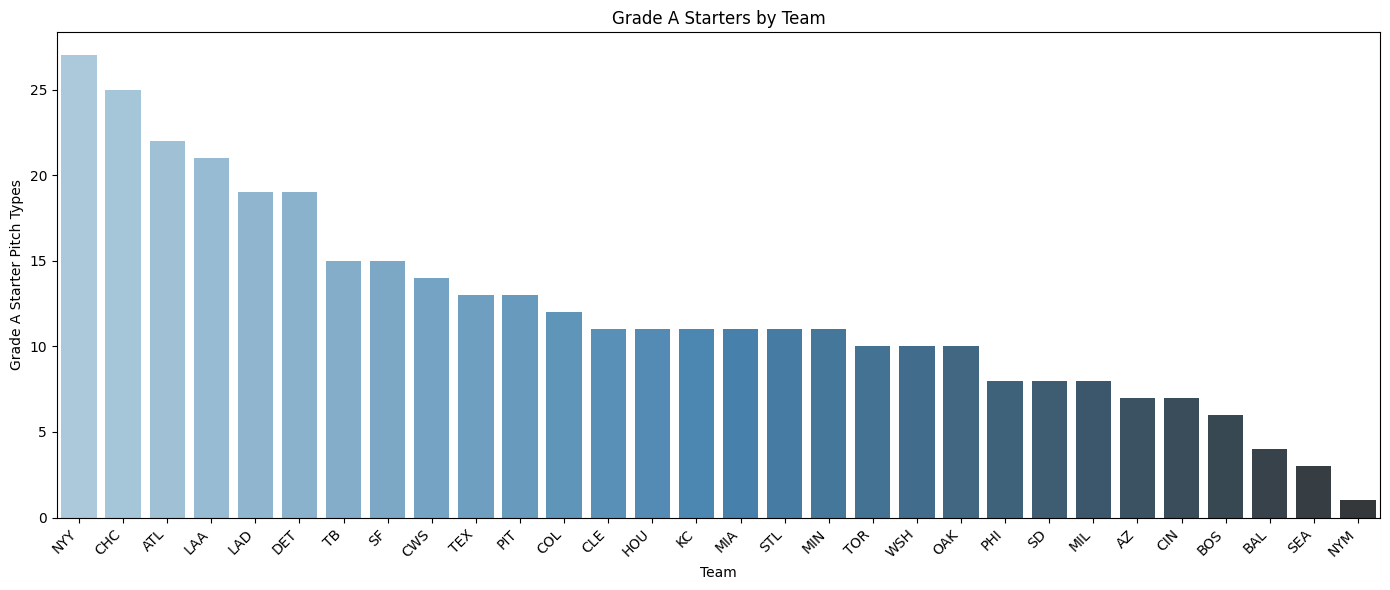

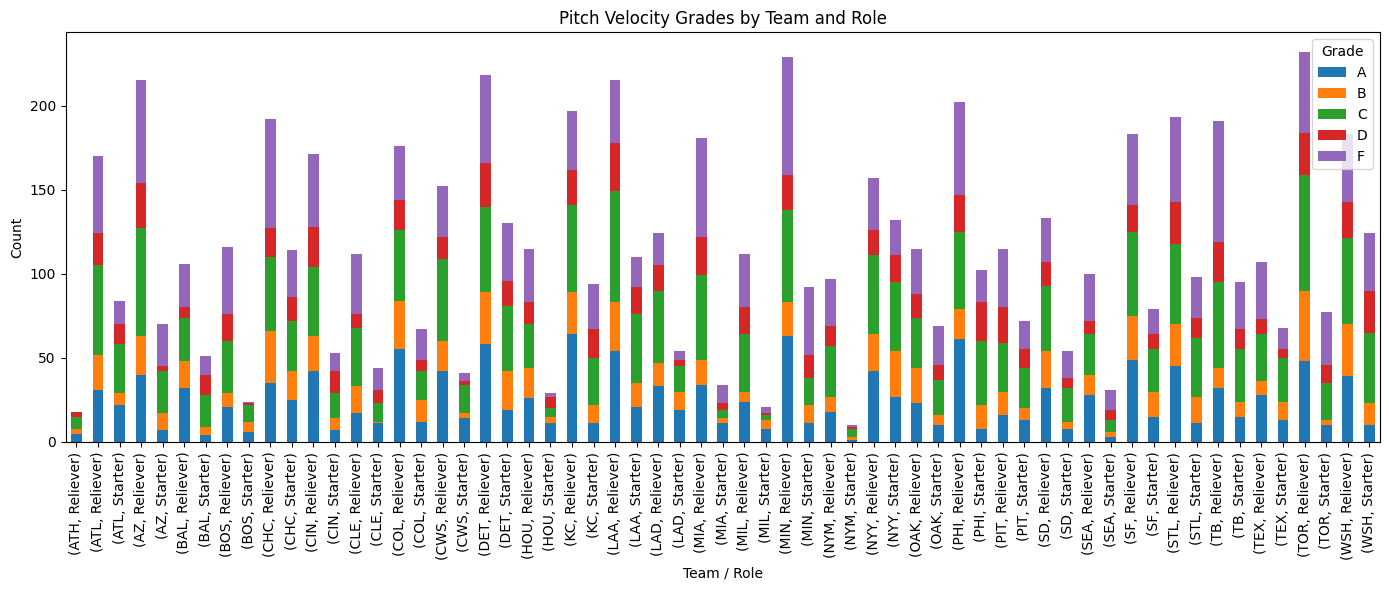

In [5]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load the team summary (fixing multi-index issue)
team_summary = pd.read_csv("../data/processed/team_pitching_summary.csv")

# 🧼 If 'team' and 'role' are one column combined, split them
if 'team' not in team_summary.columns or 'role' not in team_summary.columns:
    team_summary[['team', 'role']] = team_summary['Unnamed: 0'].str.extract(r"(\w+)\s+(\w+)")
    team_summary.drop(columns=['Unnamed: 0'], inplace=True)

# 🔁 Melt for plotting
melted = pd.melt(team_summary, id_vars=['team', 'role'], 
                 value_vars=['A', 'B', 'C', 'D', 'F'],
                 var_name='grade', value_name='count')


# 🎨 1. Velocity Grade Distribution by Role (Totaled across teams)
plt.figure(figsize=(10, 6))
sns.barplot(data=melted.groupby(['role', 'grade'])['count'].sum().reset_index(),
            x='grade', y='count', hue='role')
plt.title("Pitch Velocity Grades by Role (League-wide)")
plt.ylabel("Number of Pitcher-PitchType Pairs")
plt.xlabel("Velocity Grade")
plt.tight_layout()
plt.show()

# 🎨 All Teams by Number of Grade A Relievers (sorted)
grade_a_relievers = melted[(melted['role'] == 'Reliever') & (melted['grade'] == 'A')]
grade_a_relievers_sorted = grade_a_relievers.sort_values('count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=grade_a_relievers_sorted, x='team', y='count', palette='Greens_d')
plt.title("Grade A Relievers by Team")
plt.ylabel("Grade A Reliever Pitch Types")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 🎨 All Teams by Number of Grade A Starters (sorted)
grade_a_starters = melted[(melted['role'] == 'Starter') & (melted['grade'] == 'A')]
grade_a_starters_sorted = grade_a_starters.sort_values('count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=grade_a_starters_sorted, x='team', y='count', palette='Blues_d')
plt.title("Grade A Starters by Team")
plt.ylabel("Grade A Starter Pitch Types")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 🎨 3. Grade Distribution per Team (Stacked bar option)
pivot = melted.pivot_table(index=['team', 'role'], columns='grade', values='count', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Pitch Velocity Grades by Team and Role")
plt.ylabel("Count")
plt.xlabel("Team / Role")
plt.legend(title="Grade")
plt.tight_layout()
plt.show()
